In [1]:
%pylab inline

from coveragemap import *

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
resolution = 1852 * 60 # Pixel size in meters

In [27]:
df = read_and_filter_data(indir = "data/", outdir="filtered/", outfile="filtered.feather")

In [29]:
df = spherical_mercator_project_and_grid(df, resolution=resolution, cache="projected.feather")

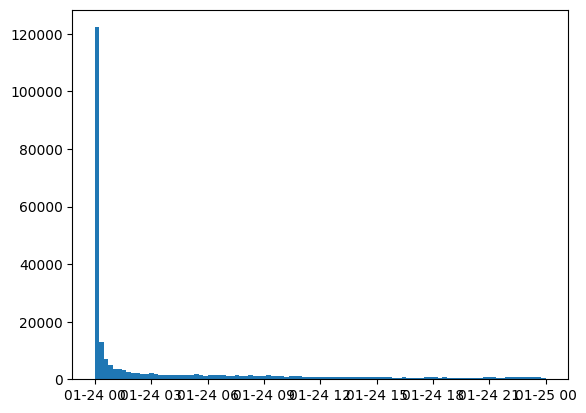

In [31]:
plt.hist(df.timestamp_datetime, bins=100)
plt.show()

In [32]:
df.timestamp_datetime.max() - df.timestamp_datetime.min()

Timedelta('1 days 00:00:00')

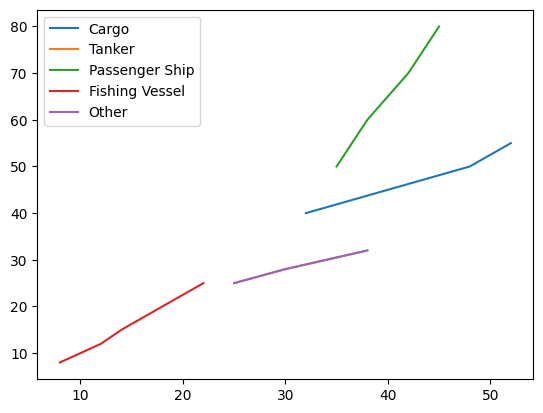

In [50]:
for name, data in ship_classes.items():
    plt.plot(data["Beam"], data["Air Draft"], label=name)
plt.legend()
plt.savefig("beam-length-vs-air-draft.svg")
plt.show()

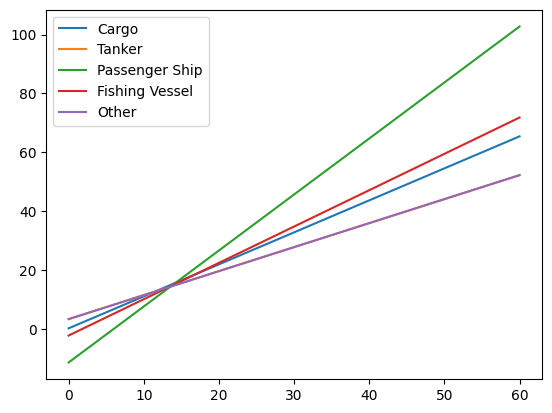

In [51]:
beam = np.linspace(0, 60, 60).reshape(60, 1)
for name, regr in ship_beam_length_to_air_draft_regressors.items():
    plt.plot(beam, regr.predict(beam), label=name)
plt.legend()
plt.savefig("beam-length-vs-air-draft-estimators.svg")
plt.show()

In [37]:
df = estimate_air_drafts_and_radar_horizon_from_beam_lengths(df, cache="air_drafts.feather")

/home/redhog/Projects/Kahu/CoverageMap/env/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


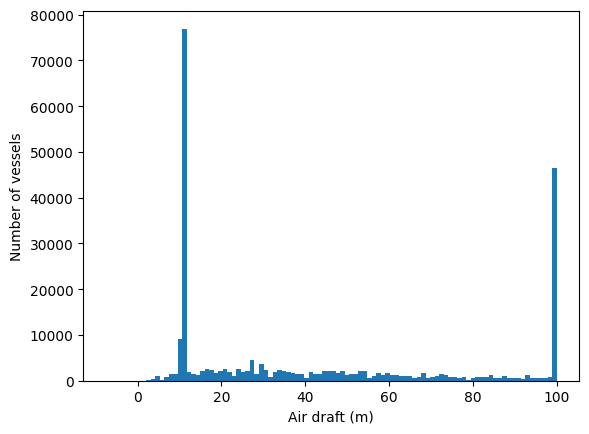

In [52]:
plt.hist(df.air_draft, bins=100)
plt.xlabel("Air draft (m)")
plt.ylabel("Number of vessels")
plt.savefig("air-draft-histogram.svg")
plt.show()

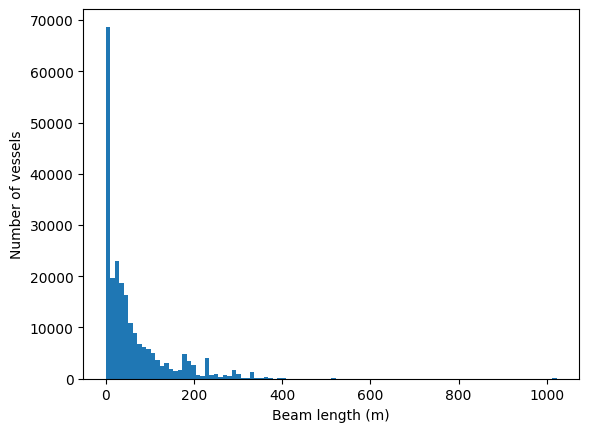

In [53]:
plt.hist(df.length, bins=100)
plt.xlabel("Beam length (m)")
plt.ylabel("Number of vessels")
plt.savefig("beam-length-histogram.svg")
plt.show()

In [41]:
grid = render_coverage_map(df, resolution=resolution, cache="coverage.tiff")

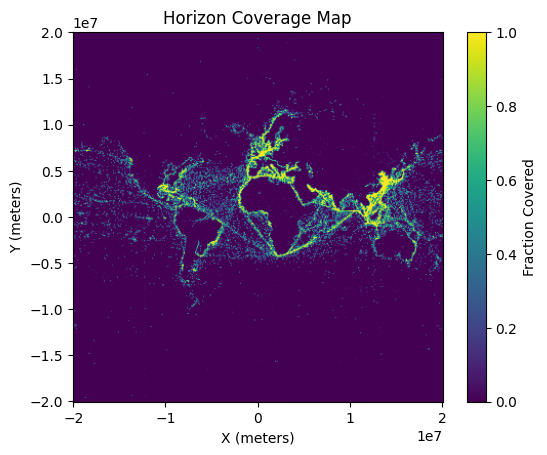

In [54]:
# Plot the raster
plt.imshow(grid, extent=[xmin, xmax, ymin, ymax], origin='lower', cmap='viridis')
plt.colorbar(label='Fraction Covered')
plt.title('Horizon Coverage Map')
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.savefig("horizon-coverage-raw.svg")
plt.show()

In [43]:
land = generate_land_map(grid.shape[0], grid.shape[1])

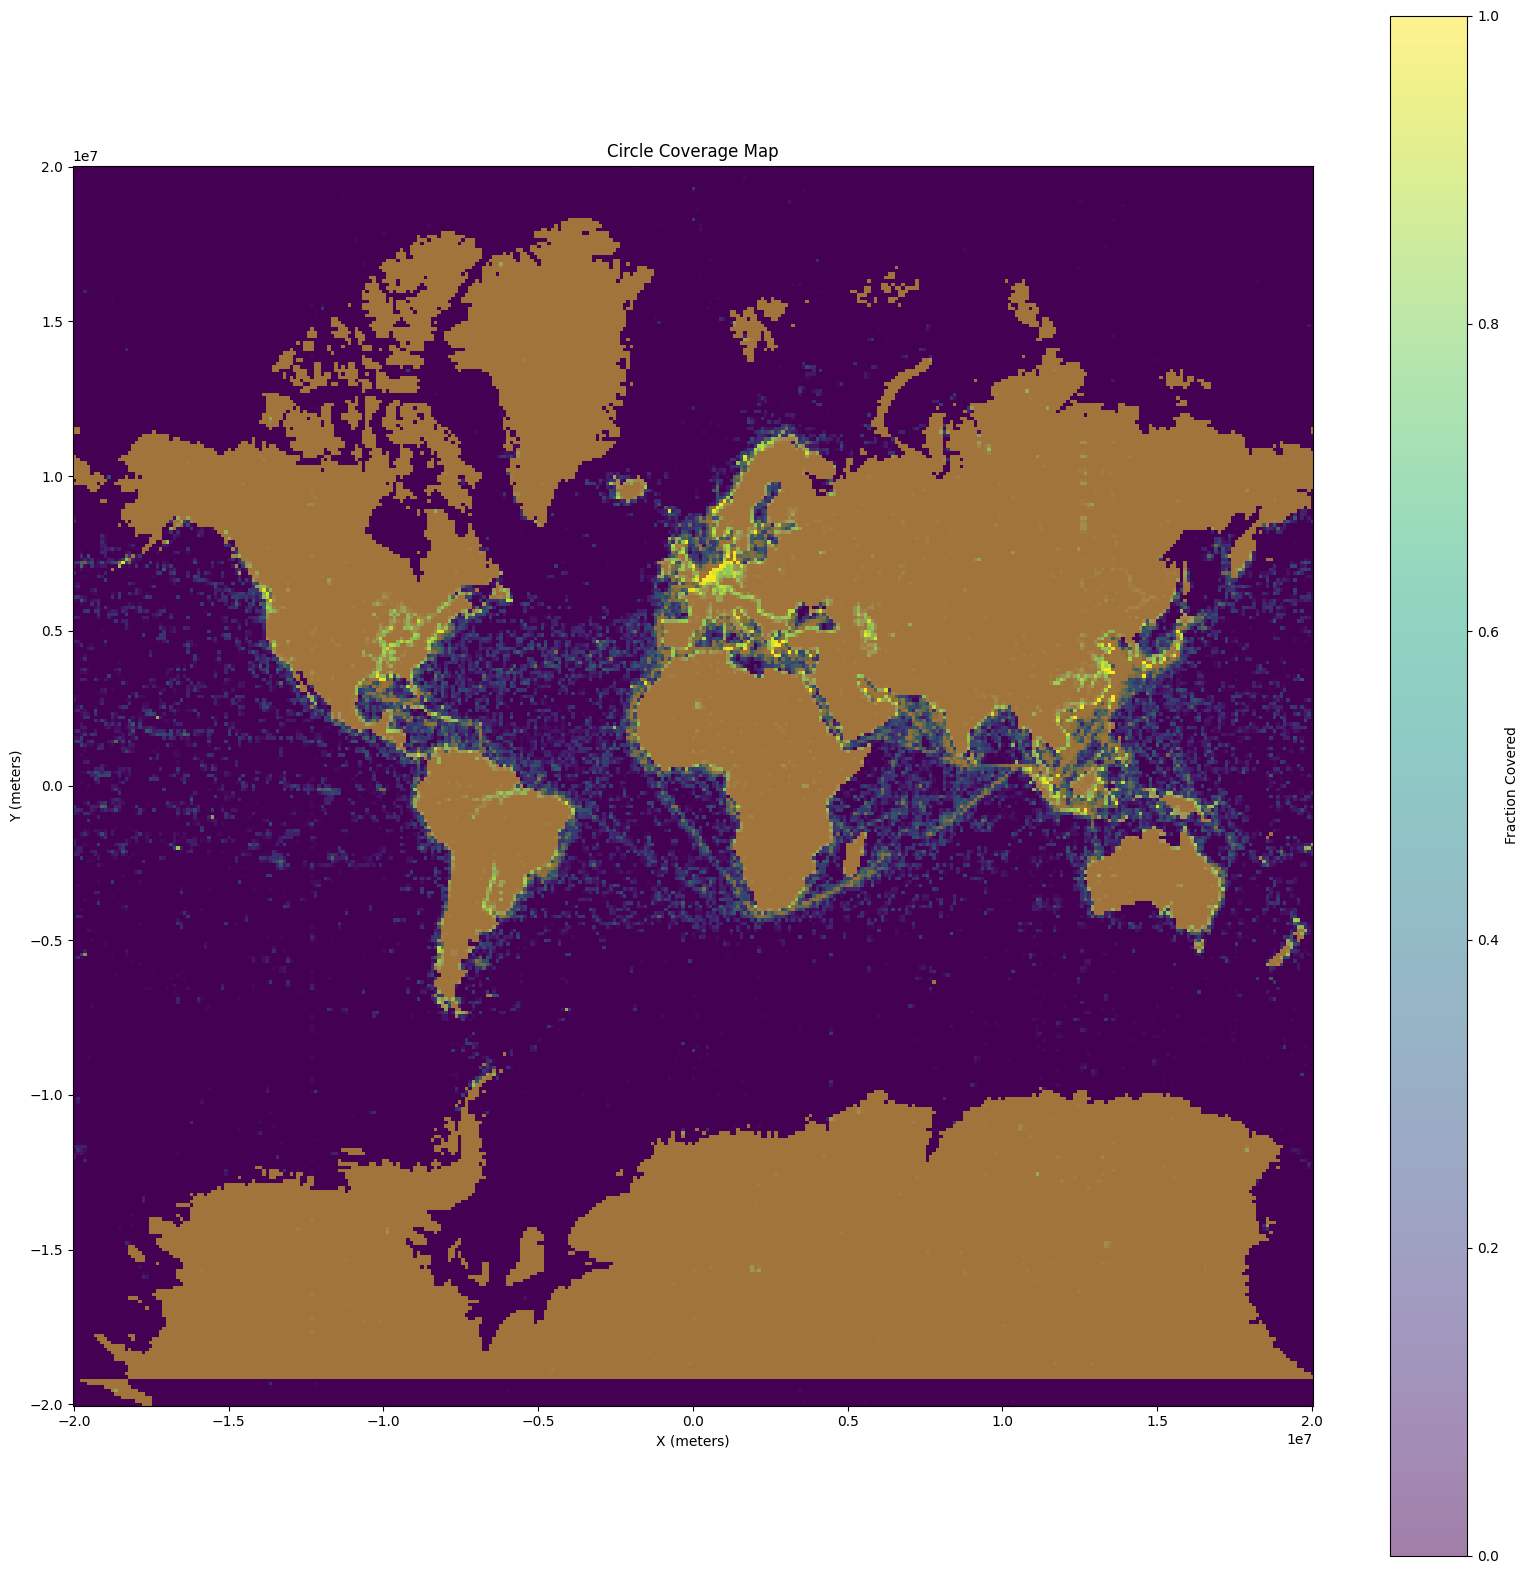

In [55]:
plt.figure(figsize=(20, 20))
plt.imshow(land, extent=[xmin, xmax, ymin, ymax], origin='lower', cmap='viridis')
plt.imshow(grid, extent=[xmin, xmax, ymin, ymax], origin='lower', cmap='viridis', alpha=0.5)

plt.colorbar(label='Fraction Covered')
plt.title('Circle Coverage Map')
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.savefig("horizon-coverage-raw+land.svg")
plt.show()

In [45]:
composite = compose_pyramids(pyramidize(grid), pyramidize(land), cutoff=0.4, cache="composite-coverage.tiff")

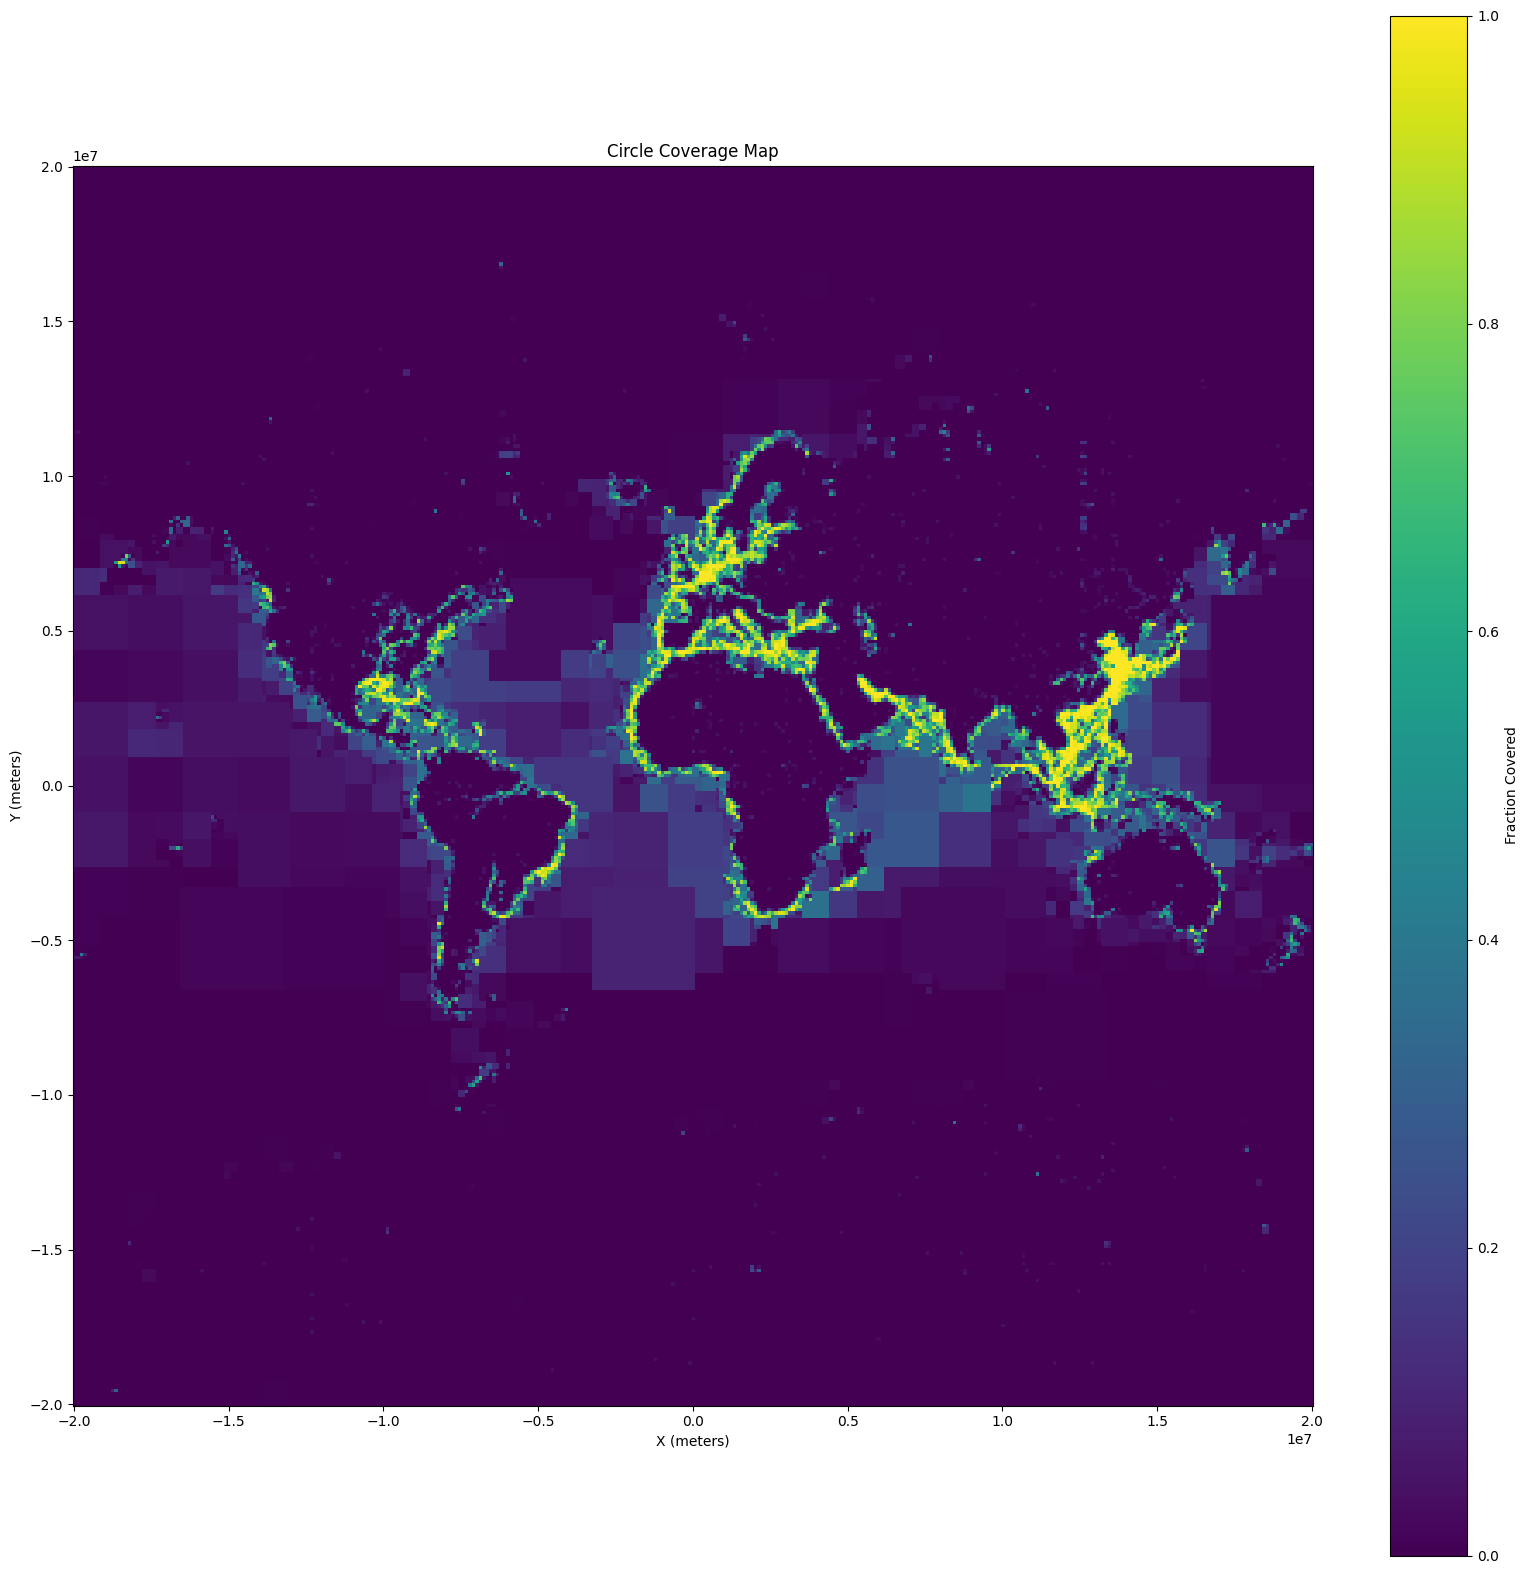

In [56]:
plt.figure(figsize=(20, 20))
plt.imshow(composite, extent=[xmin, xmax, ymin, ymax], origin='lower', cmap='viridis')
plt.colorbar(label='Fraction Covered')
plt.title('Circle Coverage Map')
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.savefig("horizon-coverage.svg")
plt.show()

In [47]:
vessel_visibility = calculate_vessel_visibility(df)

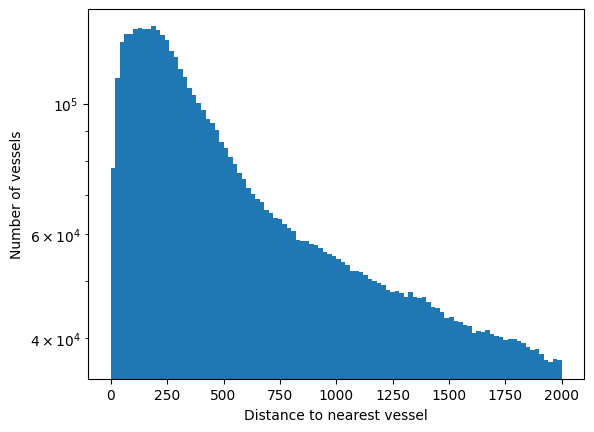

In [57]:
plt.hist(vessel_visibility["distance_to_nearest_vessel"].flatten(), bins=100, range=(0, 2000))
plt.yscale("log")
plt.ylabel("Number of vessels")
plt.xlabel("Distance to nearest vessel")
plt.savefig("distance-to-nearest-vessel-histogram.svg")
plt.show()

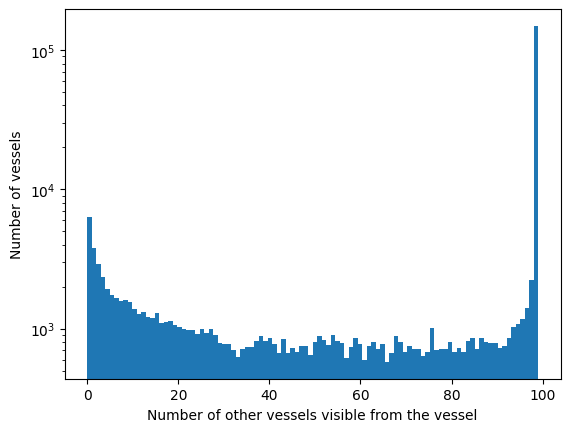

In [58]:
plt.hist(vessel_visibility["isvisible"].sum(axis=1), bins=100)
plt.yscale("log")
plt.ylabel("Number of vessels")
plt.xlabel("Number of other vessels visible from the vessel")
plt.savefig("number-of-visible-vessels-histogram.svg")
plt.show()